# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           5.02e-23
Time:                        14:24:41   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

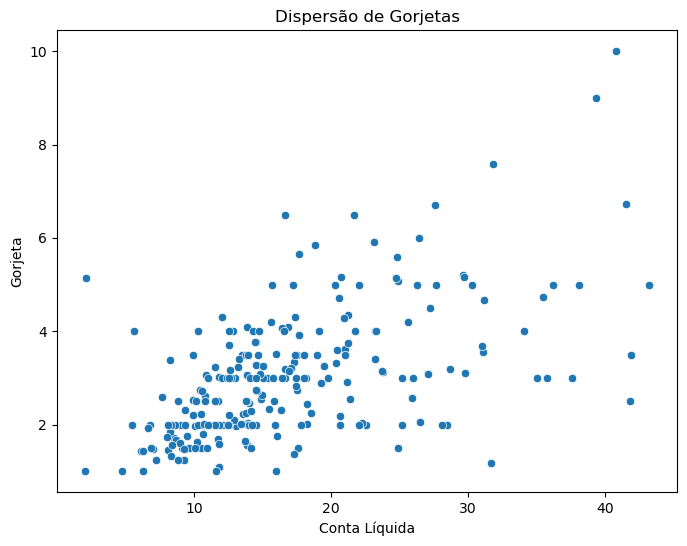

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset
import numpy as np
import statsmodels.formula.api as smf

# Carregar a base de dados
tips = sns.load_dataset("tips")

# Criar as variáveis
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = tips['tip'] / tips['net_bill']

# Regressão linear
reg = smf.ols('tip ~ net_bill', data=tips).fit()
print(reg.summary())

# Gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(x='net_bill', y='tip', data=tips)
plt.title('Dispersão de Gorjetas')
plt.xlabel('Conta Líquida')
plt.ylabel('Gorjeta')
plt.show()

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           1.62e-13
Time:                        14:29:38   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054  

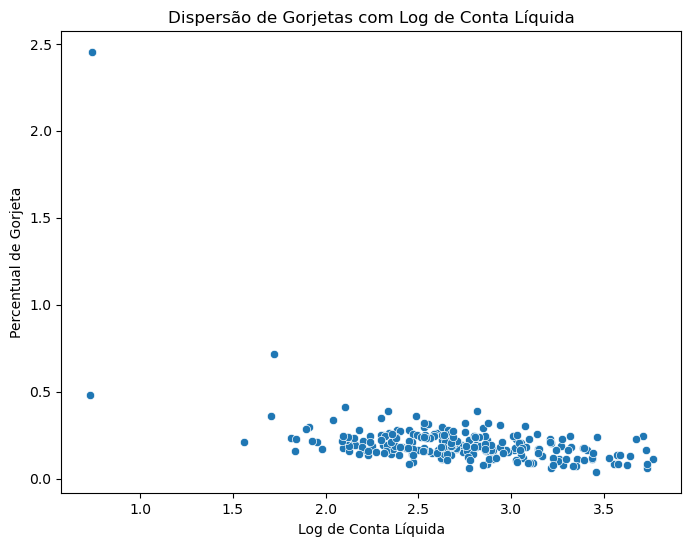

In [15]:
# Regressão linear com log de net_bill
reg_log = smf.ols('tip_pct ~ np.log(net_bill)', data =tips).fit()
print(reg_log.summary())

# Gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(x=np.log(tips['net_bill']), y=tips['tip_pct'])
plt.title('Dispersão de Gorjetas com Log de Conta Líquida')
plt.xlabel('Log de Conta Líquida')
plt.ylabel('Percentual de Gorjeta')
plt.show()

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           1.06e-09
Time:                        14:44:03   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.48

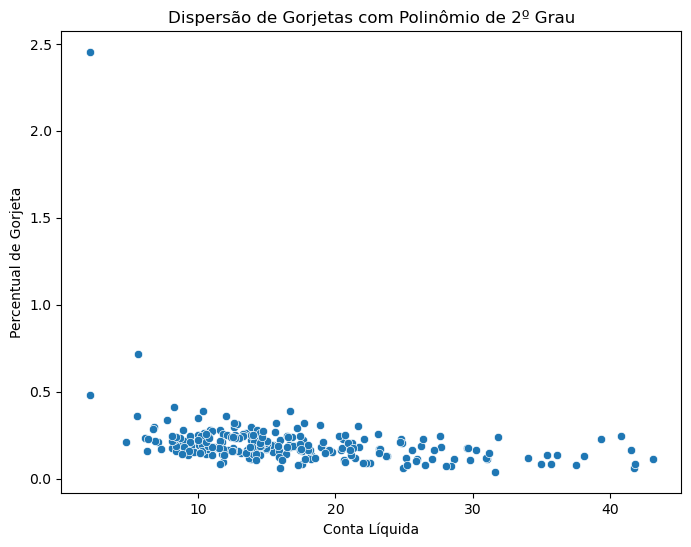

In [17]:
# Regressão polinomial de 2º grau
reg_poly = smf.ols('tip_pct ~ net_bill + np.power(net_bill, 2)', data=tips).fit()
print(reg_poly.summary())

# Gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tips['net_bill'], y=tips['tip_pct'])
plt.title('Dispersão de Gorjetas com Polinômio de 2º Grau')
plt.xlabel('Conta Líquida')
plt.ylabel('Percentual de Gorjeta')
plt.show()

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           8.27e-16
Time:                        14:47:20   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.0

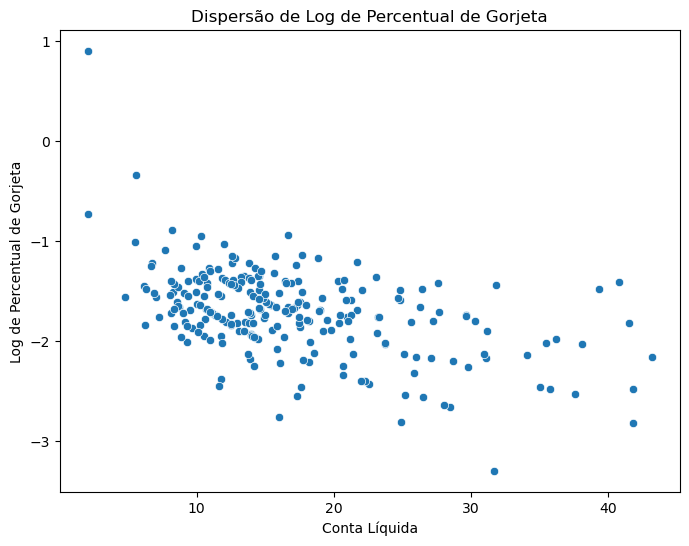

In [19]:
# Regressão linear com log de tip_pct
reg_log_tip = smf.ols('np.log(tip_pct) ~ net_bill', data=tips).fit()
print(reg_log_tip.summary())

# Calcula o R² em tip_pct
y_pred = np.exp(reg_log_tip.fittedvalues)
r2_tip = reg_log_tip.rsquared ** 2
print(f'R² em tip_pct: {r2_tip:.2f}')

# Gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tips['net_bill'], y=np.log(tips['tip_pct']))
plt.title('Dispersão de Log de Percentual de Gorjeta')
plt.xlabel('Conta Líquida')
plt.ylabel('Log de Percentual de Gorjeta')
plt.show()

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           5.20e-20
Time:                        14:48:23   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

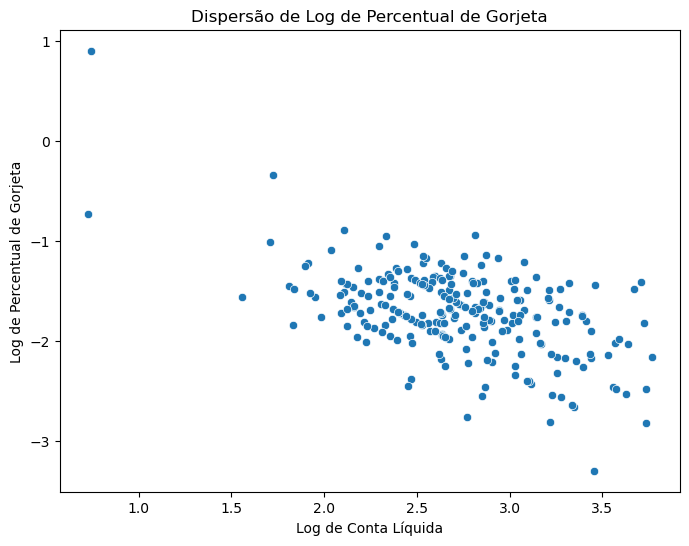

In [22]:
# Regressão linear com log de tip_pct e net_bill
reg_log_log = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data=tips).fit()
print(reg_log_log.summary())

# Calcula o R² em tip_pct
y_pred = np.exp(reg_log_log.fittedvalues)
r2_tip_log = reg_log_log.rsquared ** 2
print(f'R² em tip_pct: {r2_tip_log:.2f}')

# Gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(x=np.log(tips['net_bill']), y=np.log(tips['tip_pct']))
plt.title('Dispersão de Log de Percentual de Gorjeta')
plt.xlabel('Log de Conta Líquida')
plt.ylabel('Log de Percentual de Gorjeta')
plt.show()

###  6. qual modelo resultou no melhor ajuste?

In [25]:
print('Melhor ajuste:')
if r2_tip > r2_tip_log:
    print('Modelo log(tip_pct) ~ net_bill')
else:
    print('Modelo log(tip_pct) ~ log(net_bill)')

Melhor ajuste:
Modelo log(tip_pct) ~ log(net_bill)
